# Step 0. 들어가며

### 학습목표

---

- colab을 활용하여 독성예측 인공지능 모델을 학습하고 평가할 수 있다.
- Deepchem에 내장되어 있는 독성 데이터셋의 종류를 알고 머신러닝 모델을 학습할 수 있다.
- 분자 피쳐화에 대해서 이해하고  분자구조를 fingerprint로 변환할 수 있다.
- 독성예측 모델을 평가하는 지표의 종류에 대해 이해하고 활용 및 확인 해 볼 수 있다.
- LR, GB, RF, SVM, MLP 모델을 활용하여 간단하게 학습 및 예측 해 볼 수 있다.

### 목차
---
#### 1교시 : 40분(14:30~15:10) : 각 스텝당 10분

    Step 1 : 독성예측 데이터 Tox21 독성을 판별해 볼까요?

    - 머신러닝 기법을 이용한 독성예측
    - 독성 데이터에 대한 설명
    - 어떤 라이브러리를 쓸지

    Step 2 :  데이터 준비, 그리고 자세히 살펴보기는 기본!(Deepchem에 있는 Tox21데이터셋 살펴보기)

    - 데이터 불러오기
    - 데이터 특징 살펴보기
    - 사용할 데이터 가져오기
    - 데이터 시각화하기
    - 모델을 학습시키기위한 문제지와 정답지 준비

    Step 3 : 머신러닝 모델  학습시키기 

    - 지도학습, 분류와 회귀,
    - DT, RF, LR, SVM, MLP

    Step 4 : 머신러닝 모델 평가 및 비교하기 

#### 휴식 및 복습 : 10분(15:10 ~ 15:20)


#### 2교시 : 40분(15:20~16:00) : 각 스텝당 10분

    Step 5 : 학습 데이터 균형을 맞춰보자 

    - Oversampling과 Undersampling
    - SMOTEENN을 사용하여


    Step 6 : 다양한 알고리즘을 사용해 보자.

    - smiles를 MACCS keys로 변환하는 방법을 알아보자
    - pyhton 라이브러리 rdkit을 이용하여
    - 변환할때 주의해야 할점은?

 
    Step 7 : smiles를 직접 fingerprint로 변환 해 보자. 

    - 다른 smiles지만 같은 fingerprint를 가지는 물질
    - 중복된 물질중 label이 0인 물질을 제거


    Step 8 : 직접 만든 fingerprint로 모델 학습 및 평가하기


    Step 9 : 프로젝트

    - 훈련 세트와 검증세트를 합친 후 k-fold cv를 통해 하이퍼 파라미터를 튜닝 해 보세요
    - AutoML을 사용하여 간편하게 해 봐요!
    - tensorflow를 이용해서 딥러닝 모델을 만들어 보아요

  

In [ ]:
!pip install pycaret
from pycaret.classification import *

     |████████████████████████████████| 264 kB 30.5 MB/s 
     |████████████████████████████████| 108 kB 64.3 MB/s 
     |████████████████████████████████| 167 kB 53.7 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 248 kB 54.0 MB/s 
     |████████████████████████████████| 2.0 MB 54.8 MB/s 
     |████████████████████████████████| 271 kB 50.2 MB/s 
     |████████████████████████████████| 6.8 MB 49.2 MB/s 
     |████████████████████████████████| 1.7 MB 42.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 30.6 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 14.6 MB 42.6 MB/s 
     |████████████████████████████████| 636 kB 43.6 MB/s 
     |████████████████████████████████| 675 kB 42.6 MB/s 
     |████████████████

In [ ]:
!pip install kora -q
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem, DataStructs
from rdkit.Chem import MACCSkeys

import numpy as np
import pandas as pd

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 


# Step 1. 독성예측 데이터 Tox21,  독성을 판별해 볼까요?

DeepChem은 텐서플로 기반 머신러닝 라이브러리로써,  Drug Discovery(신약개발), materials science(재료과학), quantum chemistry(양자 화학), biology(생명과학) 분야에 특화된 모델, 알고리즘, 데이터셋을 지원합니다. 

- [About DeepChem](https://deepchem.io/about.html)

우선 colab에 Deepchem을 설치 해 볼까요?

아래와 같이 간단한 명령어로 설치할 수 있습니다. 

[MoleculeNet - deepchem 2.6.0.dev documentation](https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html#toxcast-datasets](https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html#toxcast-datasets))

In [ ]:
!pip install deepchem

     |████████████████████████████████| 552 kB 4.1 MB/s 


설치가 잘 완료되었다면 라이브러리를 불러오고 버전을 확인해 봅시다. 

In [ ]:
import deepchem as dc
dc.__version__

'2.5.0'

deepchem을 이용하여 독성 dataset을 불러올때 중간에 chemcial을 피쳐화하는 작업이 진행되는데 이를 위해서는 rdkit 이 꼭 필요합니다. 

> 피쳐화에 대해선 이후 스텝에서 자세히 설명하고 실습을 진행할 테니 우선 넘어가 봅시다! 

rdkit은 Cheminformactics(화학물질정보학) 위한 오픈소스 라이브러리로써 주로 화학물질구조로부터 특징을 추출하고 시각화하는데 쓰입니다. 

아래와 같은 명령어로 colab에서 rdkit을 설치 할 수 있습니다. 

In [ ]:
!pip install kora -q
import kora.install.rdkit

     |████████████████████████████████| 57 kB 3.6 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 


다음 단계는 머신러닝 모델을 위한 독성 데이터셋을 불러오는 것입니다. deepchem에는 사용자 편의를 위해 자주 사용되는 데이터셋을 dc.molnet(MoleculeNet의 줄임말)모듈에 포함하고 있습니다. 
여기서는 dc.molnet.load_tox21() 함수를 사용하여 `Tox21 독성 데이터셋`을 불러옵니다. 

- Tox21 데이터는 약물의 독성 예측과 관련된 표적(assay)의 실험 데이터입니다.
- [Tox21 Data Challenge](https://tripod.nih.gov/tox21/challenge/)

아래와 같이 데이터셋을 불러오겠습니다.(데이터셋을 불러오는데 30초 이상 걸릴 수 있습니다.)

In [ ]:
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21() # 약 35초가 소요됩니다.

# Step 2. 데이터 준비, 그리고 자세히 살펴보기는 기본!(Deepchem에 있는 Tox21데이터셋 살펴보기)

데이터셋을 불러오는데 성공하셨나요?

dc.molnet.load_tox21()함수는 tox21_tasks, tox21_datasets, transformers 3가지 값을 반환합니다. 

첫번째로,  tox21_tasks의 값을 살펴보도록 하겠습니다.

In [ ]:
tox21_tasks

['NR-AR',
 'NR-AR-LBD',
 'NR-AhR',
 'NR-Aromatase',
 'NR-ER',
 'NR-ER-LBD',
 'NR-PPAR-gamma',
 'SR-ARE',
 'SR-ATAD5',
 'SR-HSE',
 'SR-MMP',
 'SR-p53']

In [ ]:
len(tox21_tasks)

12

출력 결과를 통해 tox21_tasks에는 총 12개의 값이 들어있는 것을 확인할 수 있습니다. 

NR-AR등으로 표현된 각각의 이름은 생물학적 표적을 나타냅니다. 이들 표적은 잠재적인 신약에 대한 독성 반응과 관련돼 있다고 여겨지는 단백질들입니다. 생물학적 표적 각각에는 실험을 통해 얻은 수치가 포함되어있습니다. 

좀더 구체적으로 설명하면 Tox21 데이터셋에 있는 각각의 분자와 해당 단백질의 결합력을 나타냅니다. 

두번째로 tox21_datasets객체를 살펴봅시다. 

In [ ]:
tox21_datasets

(<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>,
 <DiskDataset X.shape: (783, 1024), y.shape: (783, 12), w.shape: (783, 12), ids: ['N#C[C@@H]1CC(F)(F)CN1C(=O)CNC1CC2CCC(C1)N2c1ncccn1'
  'CN(C)C(=O)NC1(c2ccccc2)CCN(CCC[C@@]2(c3ccc(Cl)c(Cl)c3)CCCN(C(=O)c3ccccc3)C2)CC1'
  'CSc1nnc(C(C)(C)C)c(=O)n1N' ...
  'O=C(O[C@H]1CN2CCC1CC2)N1CCc2ccccc2[C@@H]1c1ccccc1'
  'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3C(=C)C[C@@]21CC'
  'NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2ccc3c(c2)CCO3)C1'], task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>,
 <DiskDataset X.shape: (784, 1024), y.shape: (784, 12), w.shape: (784, 12), ids: ['CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@H]1C(=O)O.CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@H]1C(=O)O.c1ccc(CNCCNCc2ccccc2)cc1'
  'CC(C)(c1ccc(Oc2ccc3c(c2)C(=O)OC3=O)cc1)c1ccc(Oc2ccc3c(c2)C(=O)OC3=O)cc1'
  'Cc1cc(C(C)(C)C)c(O)c(C)c1

출력 결과를 보면 분자식처럼 생긴 문자열이 출력되어 있고 튜플 형태의 숫자도 들어있는데 바로 감이 잘 안오실 수도 있을 것 같습니다. 

그렇다면 좀더 보기 편하도록 하나씩 출력해서 살펴볼까요? 


In [ ]:
len(tox21_datasets)

3

tox21_datasets 에는 3개의 객체가 포함되어있는 것을 확인 했습니다. 이제 하나씩 내용을 출력해보도록 합시다. 

In [ ]:
tox21_datasets[0]

<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>

In [ ]:
tox21_datasets[1]

<DiskDataset X.shape: (783, 1024), y.shape: (783, 12), w.shape: (783, 12), ids: ['N#C[C@@H]1CC(F)(F)CN1C(=O)CNC1CC2CCC(C1)N2c1ncccn1'
 'CN(C)C(=O)NC1(c2ccccc2)CCN(CCC[C@@]2(c3ccc(Cl)c(Cl)c3)CCCN(C(=O)c3ccccc3)C2)CC1'
 'CSc1nnc(C(C)(C)C)c(=O)n1N' ...
 'O=C(O[C@H]1CN2CCC1CC2)N1CCc2ccccc2[C@@H]1c1ccccc1'
 'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3C(=C)C[C@@]21CC'
 'NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2ccc3c(c2)CCO3)C1'], task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>

In [ ]:
tox21_datasets[2]

<DiskDataset X.shape: (784, 1024), y.shape: (784, 12), w.shape: (784, 12), ids: ['CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@H]1C(=O)O.CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@H]1C(=O)O.c1ccc(CNCCNCc2ccccc2)cc1'
 'CC(C)(c1ccc(Oc2ccc3c(c2)C(=O)OC3=O)cc1)c1ccc(Oc2ccc3c(c2)C(=O)OC3=O)cc1'
 'Cc1cc(C(C)(C)C)c(O)c(C)c1Cn1c(=O)n(Cc2c(C)cc(C(C)(C)C)c(O)c2C)c(=O)n(Cc2c(C)cc(C(C)(C)C)c(O)c2C)c1=O'
 ... 'CN[C@@H]1C[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21'
 'Cl/C=C\\C[N+]12CN3CN(CN(C3)C1)C2'
 'NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1'], task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>

이제 감이 오시나요?. 각각의 객체는 DiskDataset 객체이며

각각 학습, 검증, 테스트 데이터셋 입니다. 

학습데이터셋은 머신러닝 모델에 입력으로 주어 모델을 훈련시키는데 사용하는 데이터셋 입니다. 

검증 데이터셋은 학습된 모델의 성능을 평가하고 모델 파라미터를 조정해 가며 모델의 성능을 향상시키기 위해 사용합니다.

테스트 데이터셋은 최종 학습된 모델을 평가하는데 사용합니다. 훈련과 검증 과정에서 절때 드러나서는 안되는 실전을 위한 데이터셋이기 때문에 모델의 실제 성능 측정을 위해 꼭 미리 분리 해 놓는 것이 중요합니다

</br>

데이터셋 안에는 아래와 같은 내용이 포함되어있습니다.

1. X : 물질에 대한 특징값
2. y : 12개의 표적에 대해 물질의 활성/비활성 여부
3. w : 결측치를 제외하고 데이터 불균형을 해소하기 위한 위한 가중치
4. ids : 물질의 smiles값
5. tasks_name : 12개의 생물학적 표적

In [ ]:
train_dataset, valid_dataset, test_dataset = tox21_datasets

이제 각 데이터셋의 모양을 살펴보겠습니다. 

In [ ]:
train_dataset.X.shape

(6264, 1024)

In [ ]:
valid_dataset.X.shape

(783, 1024)

In [ ]:
test_dataset.X.shape

(784, 1024)

출력 결과를 통해 훈련 데이터셋의 X 벡터에는 총 6,264개 샘플이 있고 각각의 샘플은 1024개의 피쳐값을 가짐을 알 수 있습니다.

 마찬가지로 검증 데이터셋에는 783개 테스트 데이터셋에는 784개의 샘플이 있으며 역시 1024개의 피쳐를 가지고 있습니다. 

 y벡터의 모양도 살펴보도록 하겠습니다.

In [ ]:
print(train_dataset.y.shape)
print(valid_dataset.y.shape)
print(test_dataset.y.shape)

(6264, 12)
(783, 12)
(784, 12)


각 샘플에 대해서 12개의 레이블이 있습니다. 이것은 앞에서 설명한 12가지 표적에 해당합니다. 하나의 샘플은 분자에 해당하고 각 레이블의 값은 특정 분자와 표적 단백질간 결합여부(0 또는 1) 입니다. 

지금까지 Deepchem의 dc.molnet.load_tox21()을 통해 tox21데이터 셋을 불러오고 그 모양을 살펴보았습니다!

이제 데이터셋을 우리가 보고 이해하기 쉽게 numpy배열에서 DataFrame으로 바꿔보도록 하겠습니다. 

1. 먼저 분자의 smiles(분자구조 표현식)를 하나의 컬럼으로 넣고

2. 분자의 특징을 타나태는 1024차원 벡터를 컬럼으로 넣습니다. 

3. 그후 12가지 표적에 대한 레이블을 넣어줍니다.

In [ ]:
import pandas as pd

#분자의 smiles는 .ids에 저장되어있습니다. 
train_smiles_df = pd.DataFrame(train_dataset.ids, columns = ['smiles'])
valid_smiles_df = pd.DataFrame(valid_dataset.ids, columns = ['smiles'])
test_smiles_df = pd.DataFrame(test_dataset.ids, columns = ['smiles'])

#분자의 특징은 .X 에 저장되어있습니다.
train_features_df = pd.DataFrame(train_dataset.X, columns = [c for c in range(1024)])
valid_features_df = pd.DataFrame(valid_dataset.X, columns = [c for c in range(1024)])
test_features_df = pd.DataFrame(test_dataset.X, columns = [c for c in range(1024)])

#분자의 label은 .y에 저장되어있습니다. 
#몇몇 분자들은 생화학 분석이 되어있지 않아 결측치가 존재하기 때문에 가중치가 기록되어있는 .w 행렬을 사용하여 결측치를 표시 해 줍니다.  
train_labels = np.where( train_dataset.w ==0, np.NAN , train_dataset.y )
valid_labels = np.where( valid_dataset.w ==0, np.NAN , valid_dataset.y )
test_labels = np.where( test_dataset.w ==0, np.NAN , test_dataset.y )

train_labels_df = pd.DataFrame(train_labels, columns = train_dataset.get_task_names())
valid_labels_df = pd.DataFrame(valid_labels, columns = valid_dataset.get_task_names())
test_labels_df = pd.DataFrame(test_labels, columns = test_dataset.get_task_names())



smiles와 feature와 label을 하나의 DataFrame으로 합쳐 줍니다.

In [ ]:
train_df = pd.concat([train_smiles_df, train_features_df, train_labels_df ], axis = 1)
valid_df = pd.concat([valid_smiles_df, valid_features_df, valid_labels_df ], axis = 1)
test_df = pd.concat([test_smiles_df, test_features_df, test_labels_df ], axis = 1)

자 DataFrame로 변환이 완료되었습니다! 어떠신가요? 더 직관적으로 데이터를 이해할 수 있겠죠?

train_df를 살펴보면 우리가 자주 보던 엑셀 시트 형태로 6264개의 행에 1037개의 열이 존재함을 볼 수 있습니다. 

smiles열, feature열(0~1023), target열(NR-AR ~ SRp53)이 잘 확인되시나요?

In [ ]:
train_df

,smiles,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,CC(O)(P(=O)(O)O)P(=O)(O)O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
valid_df

,smiles,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,N#C[C@@H]1CC(F)(F)CN1C(=O)CNC1CC2CCC(C1)N2c1nc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
test_df

,smiles,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

이제 데이터의 `분포`에 대해 직관적으로 파악하기 위해 그래프를 통해 시각화를 해보겠습니다.


우선 하나의 표적 `NR-AR`에 대해서 label(0 또는 1)의 분포를 알아보기 위해 seaborn의 countplot을 사용하겠습니다.

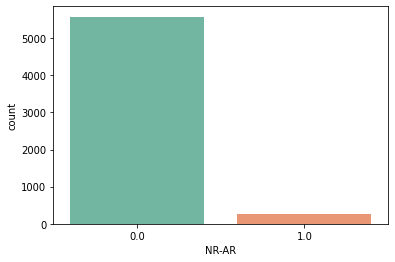

In [ ]:
import seaborn as sns
sns.countplot(train_labels_df['NR-AR'], palette="Set2")

label이 0인(독성이 없는) 샘플은 약 6000개지만 1인(독성이 있는) 샘플은 500개 수준으로 굉장히 적다는 사실을 알 수 있었습니다.

그렇다면 다른 타겟들의 데이터 균형도는 어떨까요?

총 12개의 타겟에 대해서 각각 그래프를 그려서 확인할 수 있습니다. 

하나씩 일일히 그리기는 어려우니 반복문을 이용하여 한번에 그려 봅시다. 

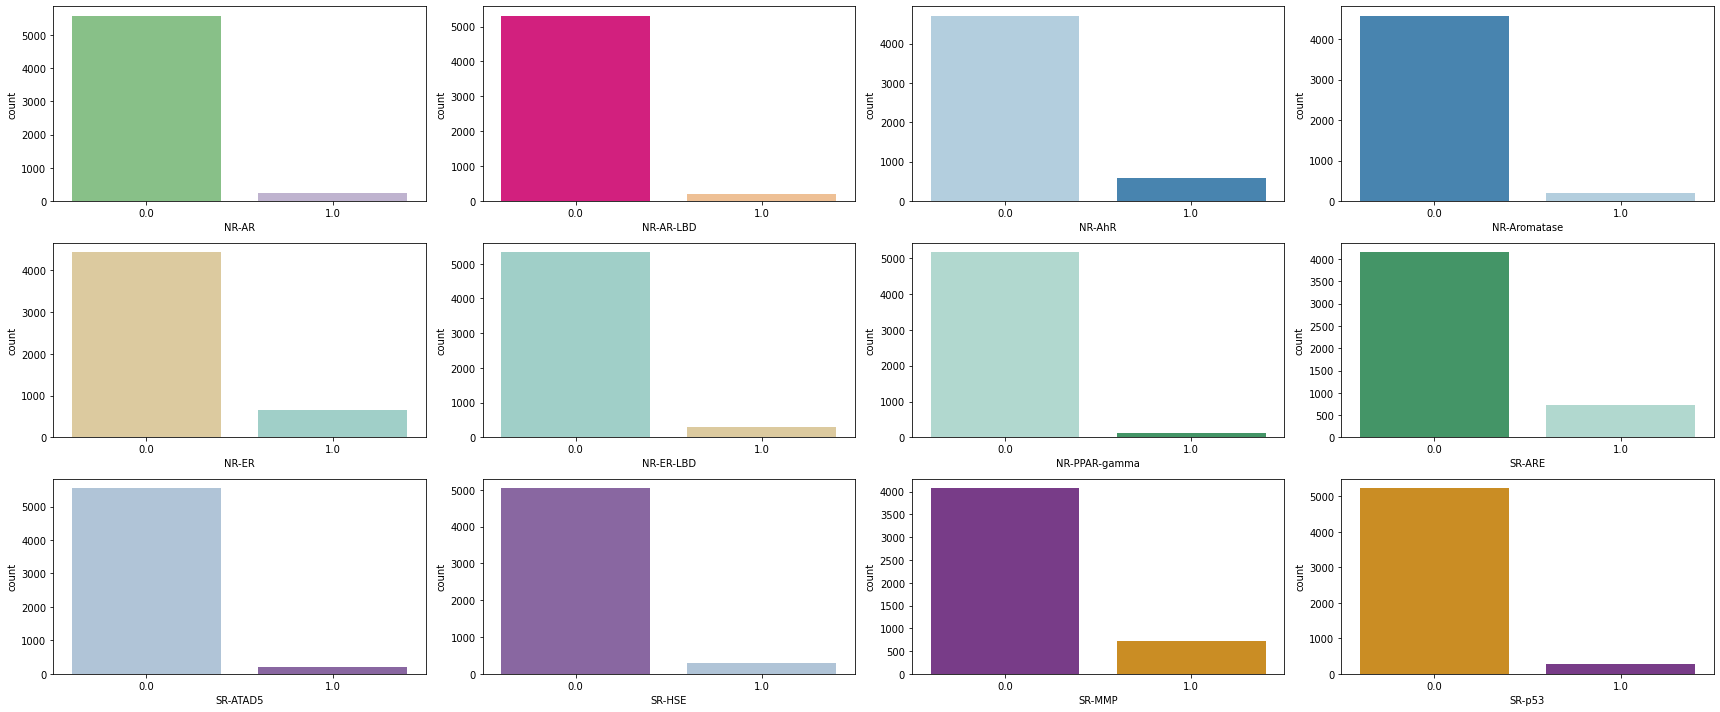

In [ ]:
import matplotlib.pyplot as plt
palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,10))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x= train_labels_df.iloc[:,i],  orient='v' , ax=ax, palette=palettes[i])
fig.tight_layout()

알록달록 예쁜 그래프가 그려졌나요? 

다른 타겟도 역시나 상황이 좋지는 않습니다. `SR-ARE`의 경우 1인 데이터가 조금 더 많긴 하지만 여전히 전체적으로 불균형이 심하네요 


리간드 결합을 이루는 소분자들은 매우 선택적으로 단백질과 같은 생체내 거대 분자에 결합합니다. 
따라서 대부분의 독성 데이터셋에서 이와 같이 불균형한 특성이 나타납니다. 

기계학습을 통해 분류기를 잘 학습하기 위해서는 균형잡힌 데이터셋이 필수이기 때문에 SMOTE등 여러 방법을 통해 균형도를 맞추려는 시도가 있습니다. 

이는 차차 알아보도록 하고요 


검증데이터셋과 훈련 데이터셋에 대해서도 균형도를 확인 해 봅시다. 

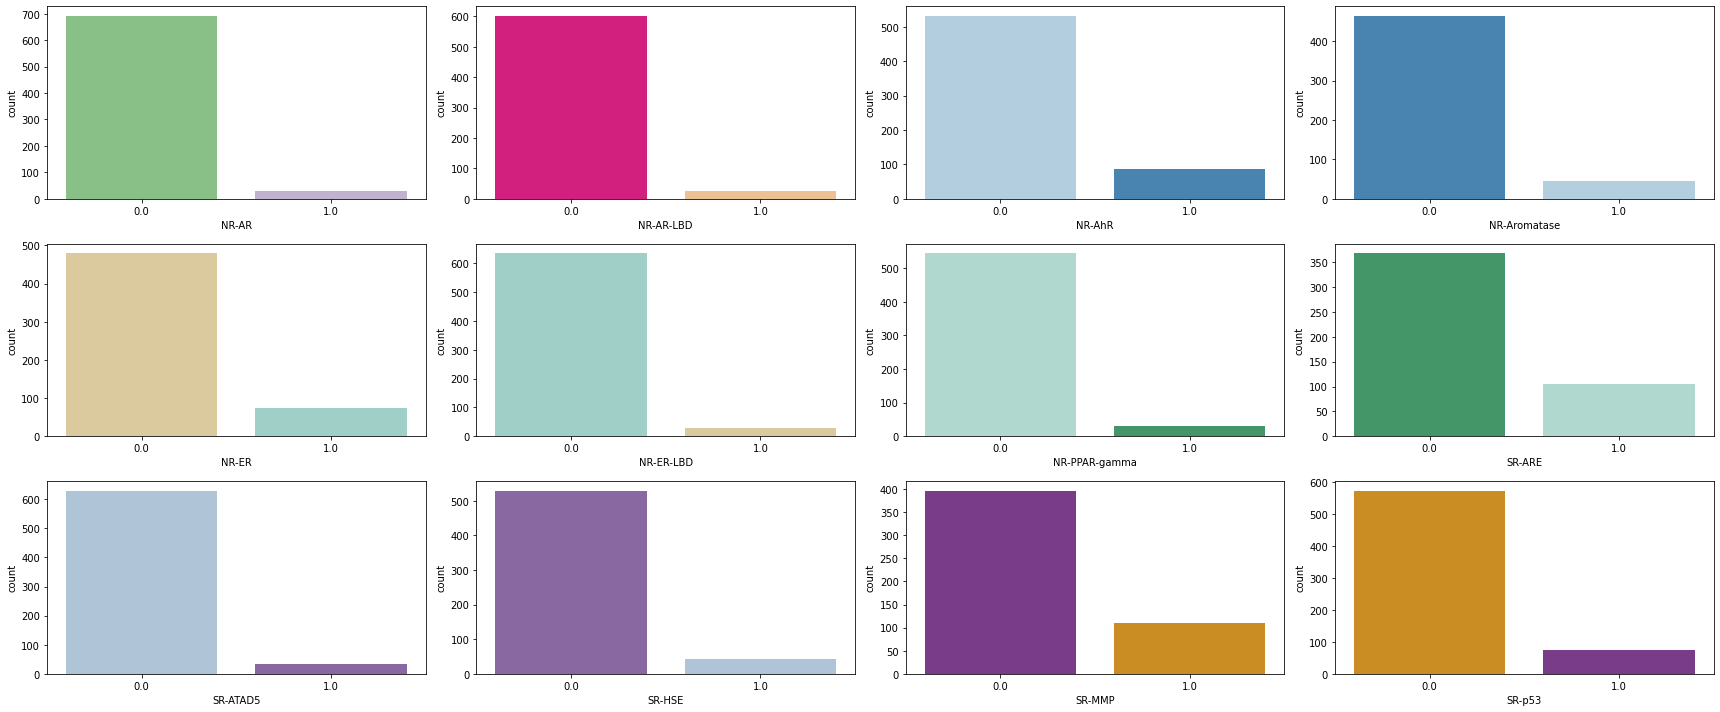

In [ ]:
import matplotlib.pyplot as plt
#Set figsize here
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,10))

# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma']
# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x= valid_labels_df.iloc[:,i],  orient='v' , ax=ax, palette=palettes[i])

fig.tight_layout()

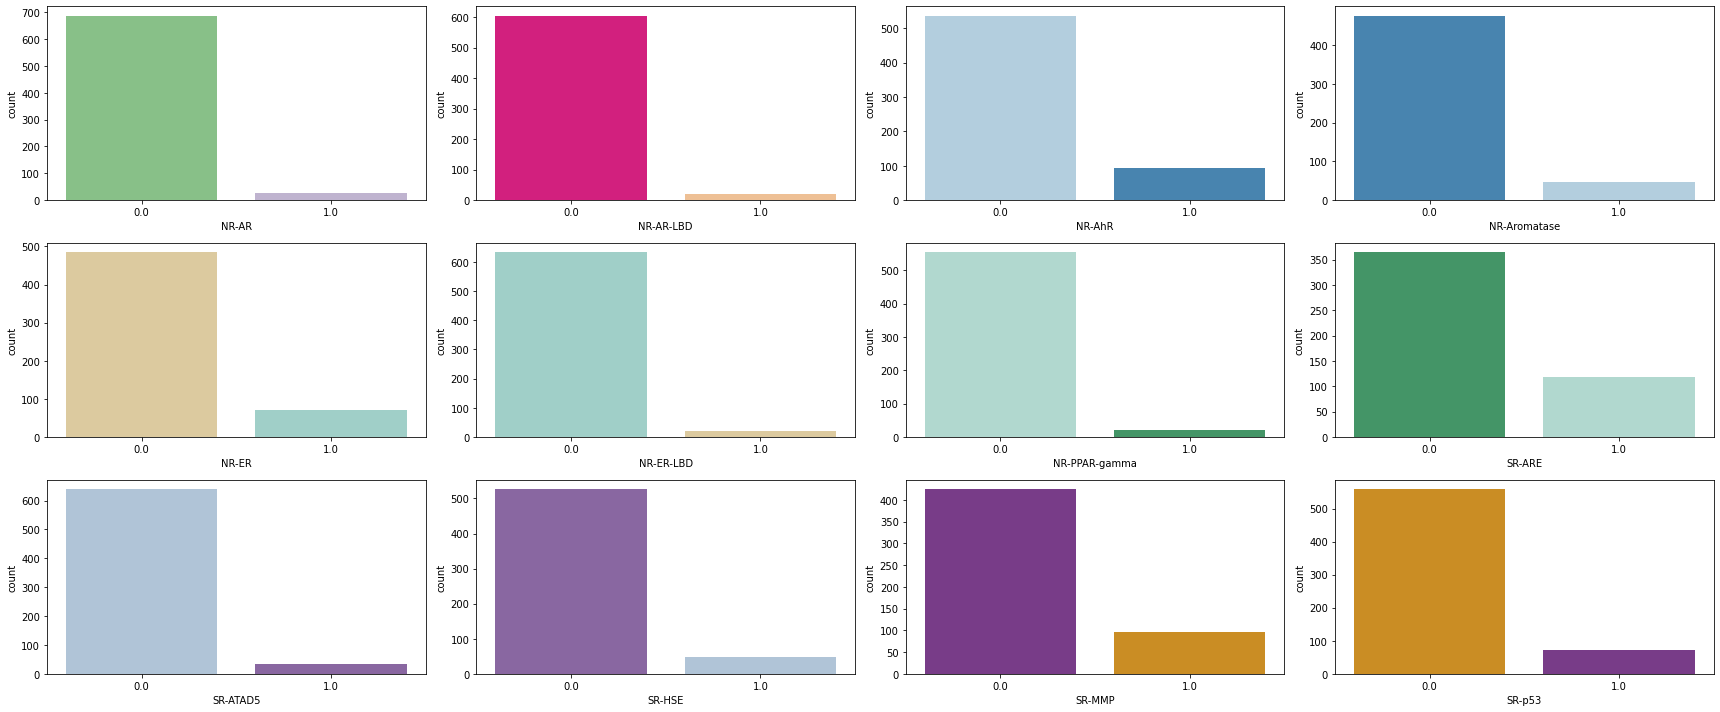

In [ ]:
import matplotlib.pyplot as plt
#Set figsize here
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,10))

# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma']
# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x= test_labels_df.iloc[:,i],  orient='v' , ax=ax, palette=palettes[i])

fig.tight_layout()

#참고문헌 : https://stackoverflow.com/questions/41659188/how-to-adjust-subplot-size-in-seaborn

검증데이터셋과 테스트데이터셋도 훈련 데이터셋과 비슷한 양상을 보입니다. 

각 타겟 어세이에서 균형도가 일정하니 train, valid, test의 분리가 잘 이루어져 있다고 말할 수 있겠습니다.

</br>

label의 분포에 대해서 확인했으니 

이제 feature에 대해서 확인해 보겠습니다. 

역시 ndarray로 되어있는 feature 값들을 DataFrame형태로 변환 해 줍니다. 총 1024개의 피쳐가 있으므로 행 이름은 0~1023으로 지정 해 줍니다. 

In [ ]:
train_features_df = train_df.iloc[:,1:1025]
valid_features_df = valid_df.iloc[:,1:1025]
test_features_df = test_df.iloc[:,1:1025]

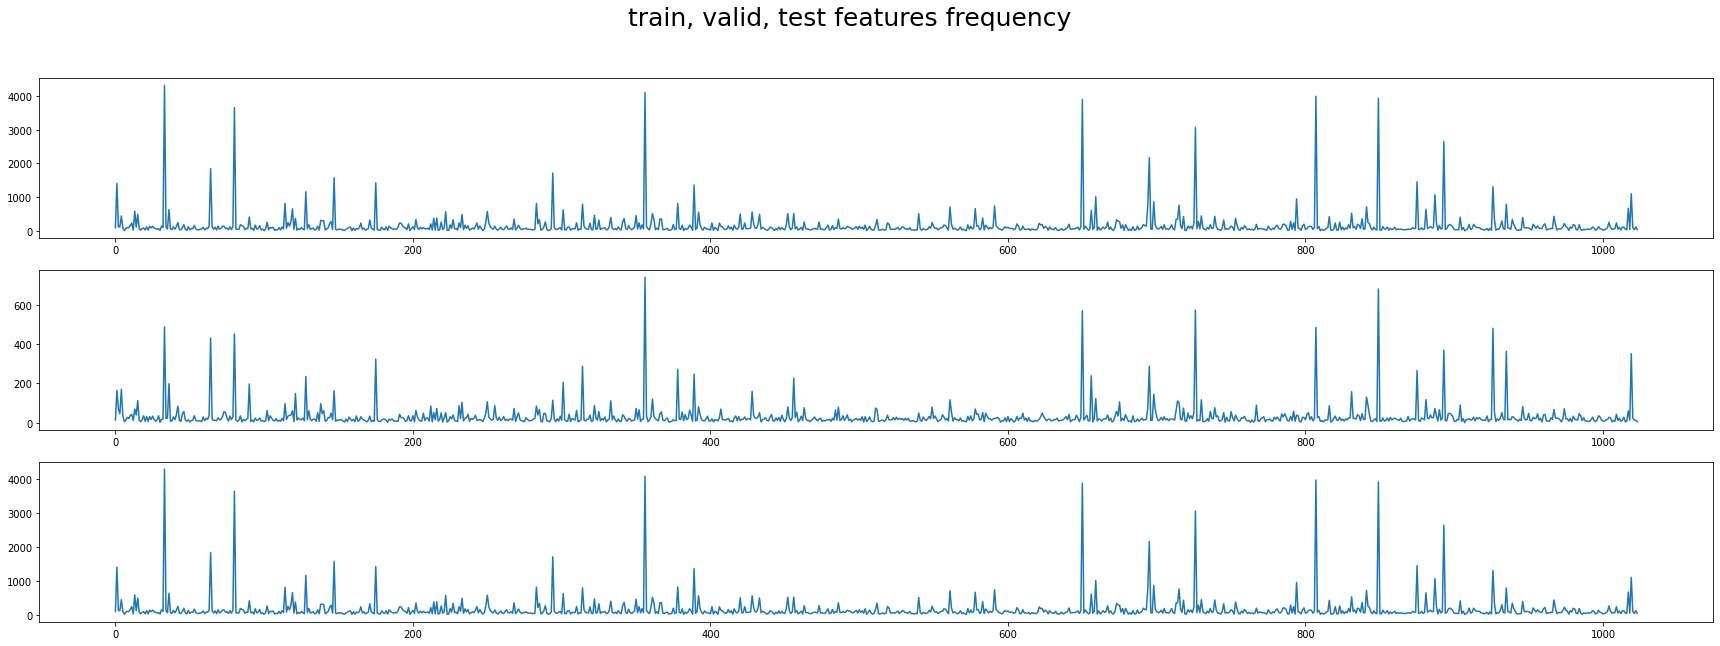

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(30,10))
fig.suptitle('train, valid, test features frequency',fontsize=25)
ax1.plot( train_features_df.sum() )
ax2.plot( valid_features_df.sum() )
ax3.plot( train_features_df.sum() )

분자들이 가지고있는 feature의 빈도를 시각화 해 모았습니다. 

</br>

몇몇 feature는 대부분의 대다수의 분자에 포함되어있지만 어떤 feature 는 소수의 분자에만 포함된 경우도 있습니다. 

이러한 feature를 가지고 머신러닝 모델을 잘 학습한다면 독성물질을 분류해 낼 수 있을 것 같습니다. 

또한 훈련 ,검증, 테스트 데이터셋에서 feature의 분포가 거의 동일한 것을 보니 원본 데이터에서 대표성을 띄게끔 잘 분할된 데이터셋임을 알 수 있습니다.  



#Step 3. 머신러닝 모델  학습시키기 

자! 이제 데이터를 자세히 살펴보았으니 모델을 학습시키는 단계로 넘어가 봅시다!

이전 스텝에서 확인했듯이 tox21 데이터셋에는 총 12개의 타겟이 존재합니다.  어떤 타겟들이 있었는지 다시한번 확인 해 볼까요?

In [ ]:
 train_dataset.get_task_names()

array(['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER',
       'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE',
       'SR-MMP', 'SR-p53'], dtype='<U13')

네 위와같이 `'NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER',
       'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE',
       'SR-MMP', 'SR-p53'` 총 12개의 타겟이 존재함을 볼 수 있습니다. 
       이번 시간에는 우선 하나의 타겟만을 예측하는 머신러닝 모델을 만들어 보겠습니다! `NR-AR`을 예측하는 모델을 만들러 가 보시죠!

       

In [ ]:
train_df

,smiles,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,CC(O)(P(=O)(O)O)P(=O)(O)O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

훈련에 사용할 데이터는 피쳐화된 데이터입니다.

분자의 smiles를 이용하여 다양한 방식으로 직접 피쳐화를 할 수도 있지만 이는 이후 스텝에서 알아보기로 하고 

여기서는 이미 피쳐화되어 제공된 1024차원의 벡터를 이용하겠습니다. 

이 1024개의 피쳐들은 바로 머신러닝 모델이 풀어야하는 `문제지` 와 같습니다. 

</br>

예를들어 CC(O)(P(=O)(O)O)P(=O)(O)O 분자에 대해 NR-AR 가 0인지 1인지 맞추어야 한다고 해봅시다. 

`[0,0,0,0,0,0.......1,0,0,1....]` 와 같은 문제가 주어지면 모델은 `0` 이라는 답을 맞추어야 하는 것입니다. 
따라서 0,1로 표현된 label데이터는 머신러닝 모델에게 `정답지`라고 할 수 있습니다                            

- 문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다.

- 정답지 : 머신러닝 모델이 맞추어야 하는 데이터. label, 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

In [ ]:
X_train = train_df.iloc[:,1:1025] # 문제지
y_train = train_df['NR-AR'] # 정답지
train = pd.concat( [ X_train, y_train], axis = 1)

X_valid = valid_df.iloc[:,1:1025]
y_valid = valid_df['NR-AR']
valid = pd.concat( [ X_valid, y_valid], axis = 1)


X_test = test_df.iloc[:,1:1025]
y_test = test_df['NR-AR']
test = pd.concat( [X_test, y_test], axis = 1)


학습전에 항상 주의해야할 것은 데이터에 결측치가 존재하는지 여부입니다. 만약 레이블에 결측치가 존재한다면 해당 샘플을 제거해 주어야 하고 feature에 결측치가 존재한다면 결측치를 제거하거나 보간 등을 통해 채워 줄 수 있습니다. 

In [ ]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum())

print(X_valid.isnull().sum().sum())
print(y_valid.isnull().sum())

print(X_test.isnull().sum().sum())
print(y_test.isnull().sum())

0
438
0
59
0
69


feature에는 결측치가 존재하지 않지만 label에는 결측치가 존재합니다. 아직 생화학 분석이 되어있지 않거나 누락된 데이터가 존재하기 때문이죠

pandas의 DataFrame형태의 데이터는 dropna()를 이용하여 손쉽게 결측치가 포함된 행을 제거할 수 있습니다. 

train, valid, test 데이터 셋에 대해서 결측치를 제외해 봅시다.

In [ ]:
train = train.dropna()

In [ ]:
train.shape

(5826, 1025)

In [ ]:
valid = valid.dropna()

In [ ]:
valid.shape

(724, 1025)

In [ ]:
test = test.dropna()

In [ ]:
test.shape

(715, 1025)

이제 결측치 제거를 완료했으니 드디어 모델학습을 진행 할 수 있겠습니다!

결측치가 제거된 train데이터로부터 문제지(X)와 정답지(y)를 분리해 주고 RandomForest분류기에 입력으로 주어 학습을 진행해 보겠습니다. 

In [ ]:
X_train = train.iloc[:,0:1023]
y_train = train['NR-AR']

X_valid = valid.iloc[:,0:1023]
y_valid = valid['NR-AR']

X_test = test.iloc[:,0:1023]
y_test = test['NR-AR']

RandomForest는 여러개의 Decision Tree를 앙상블한 모델입니다. 여러개의 Decision Tree를 형성하고 각 트리가 분류한 결과에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택하는 방식입니다. 
- [Random Forest(랜덤 포레스트) 개념 정리](https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/)

사이킷런을 이용하면 간단하게 랜덤포레스트분류기를 생성하고 학습을 시킬 수 있습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()#clf은 classifier의 약자입니다.
clf.fit(X_train, y_train)

RandomForestClassifier()

자 모델 학습이 완료되었나요? 

생각보다 간단하죠? 이미 잘 구현된 라이브러리를 통해 기계학습 모델을 쉽게 이용할 수 있다는 사실이 놀랍습니다. 

(하지만 데이터를 준비하는 과정이 더 어렵다는 사실은 안 비밀!😅)

# Step 4. 머신러닝 모델 평가 및 비교하기

모델 학습을 완료하였으니 이제 valid와 test데이터로 예측을 해 보겠습니다.



In [ ]:
y_valid_pred = clf.predict(X_valid)

In [ ]:
y_valid_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
y_test_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

위와같이 0또는 1로 예측이 완료되었음을 볼 수 있습니다. 
얼마나 잘 맞추었는지 확인하기 위해서는 어떻게 해야할까요?

성능을 평가하는 방법에는 다양한 척도가 있는데 이중 정확도(Accuracy)를 간단히 확인해 보겠습니다.

In [ ]:
from sklearn.metrics import accuracy_score
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_accuracy

0.9751381215469613

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.9706293706293706

vaild와 test정확도 둘다 약 0.97정도의 수치가 나왔습니다. 이는 97%정도의 정확도를 보인다는 뜻입니다. 
정확도는 전체 개수 중 맞은 것의 개수를 나타냅니다. 아래와 같은 식으로 나타낼 수 있습니다.

$$정확도 = \frac{예측\,결과가\,정답인\,데이터의\,개수} {예측한\,전체\,데이터의\,개수}$$


얼핏 보면 굉장히 예측을 잘 하는 모델이다 라고 생각할 수 있습니다. 하지만 여기에는 한가지 `함정` 이 숨어있습니다.

바로 모델이 실제 label이 1인 분자의 절반정도를 0이라고 1이라고 분류했다는 사실인데요, 정확도가 97%라고 했는데 어째서 이러한 일이 일어난 것일가요

오차 행렬(confusion_matrix)을 살펴보며 알아보도록 하겠습니다.

오차 행렬은 예측 레이블과 실제 레이블간의 예측 오류가 얼마인지 쉽게 알아볼 수 있는 지표입니다. 




- [오차 행렬](https://velog.io/@sset2323/03-02.-%EC%98%A4%EC%B0%A8-%ED%96%89%EB%A0%AC-Confusion-Matrix)

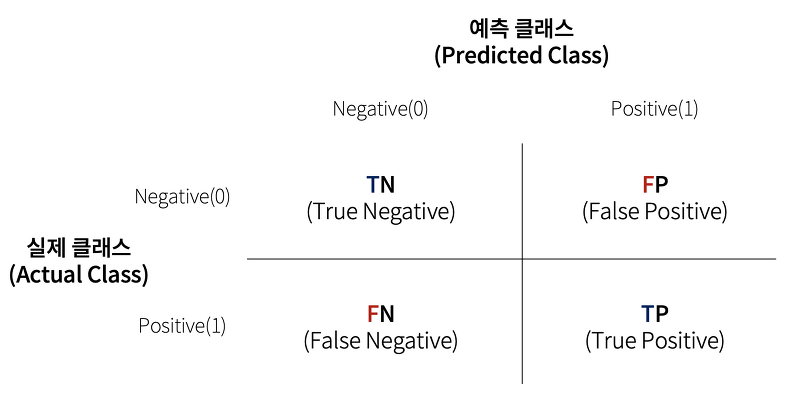

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat_valid = confusion_matrix(y_valid,y_valid_pred)
conf_mat_valid

array([[692,   1],
       [ 17,  14]])

오차 행렬을 보니 실제 0인 분자는 1개를 제외하고 대부분 잘 예측한것에 비해 

실제 1인 것중 19개를 모델이 잘못 예측 했음을 볼 수 있습니다. 

In [ ]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)
conf_mat_test

array([[684,   4],
       [ 17,  10]])

테스트 데이터셋의 오차 행렬도 마찬가지로 실제 1인 분자를  절반이상 0으로 잘못 예측 했음을 볼 수 있습니다.

이는 불균형 데이터셋으로 머신러닝 모델을 학습하고 예측할때 자주 일어나는 현상입니다. 전체 테스트 데이터 715개 분자중 소수 클래스(1)의 데이터 수가 27개로 굉장히 적기 때문에 모델이 모든 데이터를 0이라고 분류해도 정확도는 96.2%가 나오게 됩니다. 

그렇기 때문에 불균형 데이터셋에서 정확도는 모델의 성능을 평가하는데 좋은 지표가 아닙니다.

추가적으로 아래와 같은 지표를 사용해서 적절하게 모델을 평가해야 합니다. 

</br>

###Recall(재현률)  
--- 
- 실제 양성(1) 중 모델이 1이라고 예측한 비율

</br>



###Precision(정밀도) 
--- 
- 예측 양성(1) 중 실제로 1인 비율

</br>



###balanced_Accuary(균형 정확도)
--- 
- Recall 과 specificity(실제 0인 것중 모델이 0이라한것의 비율) 의 평균

</br>



###F1
--- 
- Recall과 Precision의 조화평균

</br>



###AUC(Area Under the Curve)  
--- 
- [ROC 및 AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- ROC곡선 아래의 영역

</br>



###MCC
--- 
- [메튜 상관계수](https://ivoryrabbit.github.io/%EC%88%98%ED%95%99/2021/03/12/%EB%A7%A4%ED%8A%9C-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98.html)
- 정답 벡터와 예측벡터가 얼마나 유사한지 나타내는 상관계수

</br>

그렇다면 실제로 위와 같은 지표들을 계산 해 볼까요? 위에서 예측했던 결과 벡터와 그 오차행렬을 이용해서 계산할 수 있습니다.


우선 metric 값을 저장할 DataFrame을 하나 만들어 주겠습니다.


In [ ]:
metric_df = pd.DataFrame(columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'])

검증 데이터셋에 대해서 모든 지표를 계산 후 DataFrame에 추가 해 줍시다.


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

y_valid_pred = clf.predict(X_valid)
y_valid_pred_proba =  clf.predict_proba(X_valid)

conf_mat_valid = confusion_matrix(y_valid,y_valid_pred)
tn, fp, fn, tp = conf_mat_valid.ravel()

auc =  roc_auc_score(y_valid,y_valid_pred_proba[:,1] )

recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
b_a = (recall + specificity) / 2
precision =  tp / (tp+fp)
F1 = 2* (precision * recall) / (precision + recall)
MCC = matthews_corrcoef(y_valid,y_valid_pred)
accuracy = accuracy_score(y_valid, y_valid_pred)


metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'], index = ["RF_valid(Before smote)"]) )

In [ ]:
metric_df

,AUC,B_A,Recall,Precision,F1,MCC,Accuracy
RF_valid(Before smote),0.721152,0.725085,0.451613,0.933333,0.608696,0.639816,0.975138


테스트 데이터셋에 대해서 모든 지표를 계산 후 DataFrame에 추가 해 줍시다.

In [ ]:
y_test_pred = clf.predict(X_test)
y_test_pred_proba =  clf.predict_proba(X_test)

conf_mat_test = confusion_matrix(y_test,y_test_pred)
tn, fp, fn, tp = conf_mat_test.ravel()

auc =  roc_auc_score(y_test,y_test_pred_proba[:,1] )

recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
b_a = (recall + specificity) / 2
precision =  tp / (tp+fp)
F1 = 2* (precision * recall) / (precision + recall)
MCC = matthews_corrcoef(y_test,y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)


metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'], index = ["RF_test(Before smote)"]) )

In [ ]:
metric_df

,AUC,B_A,Recall,Precision,F1,MCC,Accuracy
RF_valid(Before smote),0.721152,0.725085,0.451613,0.933333,0.608696,0.639816,0.975138
RF_test(Before smote),0.733877,0.682278,0.370370,0.714286,0.487805,0.501554,0.970629


검증 결과와 테스트 결과를 여러 평가척도를 통해 비교하기 쉽도록 결과가 출력되었습니다. 

어떠신가요? 정확도는 꽤 높지만 다른 평가 척도를 보니 아직 좋은 모델이라고 말하기는 어려울 것 같습니다. 

독성이 있는 분자를 잘 분류 해내지 못한다면 그 모델은 쓸모없는 모델이 될 수 밖에 없겠죠 

다음 스텝에서는 모델의 분류 성능을 더욱 향상시킬 수 있도록 학습시킬 데이터의 균형을 맞추는 작업을 진행해 보겠습니다! 


# Step 5. 학습 데이터 균형을 맞춰보자

불균형한 학습 데이터의 균형을 맞춰주기 위한 대표적인 방법으로 언더샘플링과 오버샘플링이 있습니다. 



> 1. UnderSampling(언더샘플링)
> - 다수 클래스(독성이 없는) 샘플을 제거하여 데이터 균형도를 맞춰주는 방식
> - 정보손실의 위험이 크다. 

</br>

> 2. OverSampling(오버샘플링)
> - 소수 클래스(독성이 있는) 샘플을 보간을 통해 생성하여 데이터 균형도를 맞춰주는 방식
> - 종종 생성된 소수 클래스 샘플이 다수 샘플 공간으로 가게되어 성능 저하의 원인이 될 수 있음


여기에서는 SMOTEENN 기법을 사용하여 Oversampling하도록 하겠습니다. 
SMOTEEN은 SMOTE 와 ENN 알고리즘의 조합으로써 SMOTE기법으로 생성된 잘못된 샘플을 ENN을 통해 제거해 주는 방식입니다. 

- [SMOTENN 논문](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00468-x)

Imbalanced-learn (imported as imblearn)을 통해 SMOTEENN을 사용할 수 있습니다. 

아래와 같이 import 해 주고 SMOTENN객체를 정의해 줍니다. 

In [ ]:
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(random_state=42,sampling_strategy = "minority")

fit_sample함수에 oversmapling할 문제지와 정답지를 넣어줍니다.(시간이 다소 소요될 수 있습니다.)



In [ ]:
X_smoted, y_smoted = sme.fit_sample(X_train, y_train)

잘 oversampling되었는지 확인 해 볼까요?

In [ ]:
X_smoted.shape

(9971, 1023)

In [ ]:
pd.DataFrame(y_smoted).value_counts()

NR-AR
1.0      5544
0.0      4427
dtype: int64

레이블이 1인 샘플이 생성되어 어느정도 균형이 맞춰진것을 확인 할 수 있습니다. 

SMOTEENN을 적용한 훈련 데이터로 랜덤포레스트 모델을 학습해보도록 하겠습니다.

In [ ]:
clf2 = RandomForestClassifier()
clf2.fit(X_smoted, y_smoted)

RandomForestClassifier()

이제 모델을 여러가지 평가척도를 통해 평가해보도록 하겠습니다. 

In [ ]:

result =  clf2.predict_proba(X_valid) # 첫 클래스의 예측확률, 두번째 클래스의 예측 확률 어떤것이 0, 1이지?
y_pred = clf2.predict(X_valid)
conf_mat = confusion_matrix(y_valid,y_pred)
tn, fp, fn, tp = conf_mat.ravel()

auc =  roc_auc_score(y_valid,result[:,1] )
recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
b_a = (recall + specificity) / 2
precision =  tp / (tp+fp)
F1 = 2* (precision * recall) / (precision + recall)
MCC = matthews_corrcoef(y_valid,y_pred)
accuracy = clf2.score(X_valid,y_valid)
metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'], index = ["RF_valid"]) )


result =  clf2.predict_proba(X_test) # 첫 클래스의 예측확률, 두번째 클래스의 예측 확률 어떤것이 0, 1이지?
y_pred = clf2.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = conf_mat.ravel()

auc =  roc_auc_score(y_test,result[:,1] )
recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
b_a = (recall + specificity) / 2
precision =  tp / (tp+fp)
F1 = 2* (precision * recall) / (precision + recall)
MCC = matthews_corrcoef(y_test,y_pred)
accuracy = clf2.score(X_test,y_test)
metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'], index = ["RF_test"]) )

In [ ]:
metric_df

,AUC,B_A,Recall,Precision,F1,MCC,Accuracy
RF_valid(Before smote),0.721152,0.725085,0.451613,0.933333,0.608696,0.639816,0.975138
RF_test(Before smote),0.733877,0.682278,0.370370,0.714286,0.487805,0.501554,0.970629
RF_valid,0.767584,0.735442,0.483871,0.625000,0.545455,0.532484,0.965470
RF_test,0.706449,0.695710,0.407407,0.500000,0.448980,0.432056,0.962238


네 결과가 나왔습니다.SMOTEENN을 적용하기 전과 한번 비교해 보겠습니다. 

다른 척도는 비슷하지만 Recall경우 꽤나 향상되었음을 확인할 수 있습니다. 

하지만 여전히 만족할만한 성능은 아닌 것 같습니다

# Step 6. 다양한 알고리즘을 사용해 보자.

이번에는 RF뿐만 아니라 다양한 머신러닝 알고리즘을 학습시켜보고 성능을 비교해 보도록 하겠습니다. 

여러가지 머신러닝 알고리즘들이 있지만 사이킷런에서 제공하는 몇가지 알고리즘들을 사용해보도록 하겠습니다.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

우선 모델을 학습하고 결과를 얻기 쉽도록 함수를 하나 정의하도록 하겠습니다. 

함수 안에는 모델을 학습하고 훈련, 테스트셋에 대한 결과를 내는 모든 과정이 포함되어있습니다.

In [ ]:
#define function : train model & get result
def tm_gr(algo, metric_df, X_train, y_train, X_valid, y_valid, X_test, y_test, index="") : 
    if algo == 'NB' : 
      clf = GaussianNB()
    if algo == 'LR' : 
      clf = LogisticRegression()
    if algo == 'RF' : 
      clf = RandomForestClassifier()
    if algo == 'KNN' : 
      clf = KNeighborsClassifier()
    if algo == 'GBT' : 
      clf = GradientBoostingClassifier()
    if algo == 'MLP' : 
      clf = MLPClassifier()


    clf.fit(X_train, y_train)

    #validation
    result =  clf.predict_proba(X_valid) # 첫 클래스의 예측확률, 두번째 클래스의 예측 확률 어떤것이 0, 1이지?
    y_pred = clf.predict(X_valid)

    conf_mat = confusion_matrix(y_valid,y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    auc =  roc_auc_score(y_valid,result[:,1] )
    recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
    specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
    b_a = (recall + specificity) / 2
    precision =  tp / (tp+fp)
    F1 = 2* (precision * recall) / (precision + recall)
    MCC = matthews_corrcoef(y_valid,y_pred)
    accuracy = clf.score(X_valid,y_valid)

    metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'],index = [index + algo+'_valid']) )


    #test
    result =  clf.predict_proba(X_test) # 첫 클래스의 예측확률, 두번째 클래스의 예측 확률 어떤것이 0, 1이지?
    y_pred = clf.predict(X_test)

    conf_mat = confusion_matrix(y_test,y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    auc =  roc_auc_score(y_test,result[:,1] )
    recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
    specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
    b_a = (recall + specificity) / 2
    precision =  tp / (tp+fp)
    F1 = 2* (precision * recall) / (precision + recall)
    MCC = matthews_corrcoef(y_test,y_pred)
    accuracy = clf.score(X_test,y_test)

    metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'], index = [index + algo+'_test'] ) )
    

    return clf, metric_df


베이즈 분류기를 학습시키고 결과를 얻어봅시다

In [ ]:
# nb_clf, metric_df = tm_gr('NB', metric_df, X_smoted, y_smoted, X_valid, y_valid, X_test, y_test )

knn 분류기를 학습시키고 결과를 얻어봅시다

In [ ]:
# knn_clf, metric_df = tm_gr('KNN', metric_df, X_smoted, y_smoted, X_valid, y_valid, X_test, y_test )

그래디언트 부스팅 분류기를 학습시키고 결과를 얻어봅시다.

In [ ]:
# gbt_clf, metric_df = tm_gr('GBT', metric_df, X_smoted, y_smoted, X_valid, y_valid, X_test, y_test )

mlp 분류기를 학습시키고 결과를 얻어봅시다. 

In [ ]:
# mlp_clf, metric_df = tm_gr('MLP', metric_df, X_smoted, y_smoted, X_valid, y_valid, X_test, y_test )

In [ ]:
metric_df

,AUC,B_A,Recall,Precision,F1,MCC,Accuracy
RF_valid(Before smote),0.779593,0.692827,0.387097,0.923077,0.545455,0.587948,0.972376
RF_test(Before smote),0.657973,0.663760,0.333333,0.692308,0.450000,0.467275,0.969231
RF_valid,0.737350,0.736163,0.483871,0.652174,0.555556,0.545214,0.966851
RF_test,0.751346,0.697163,0.407407,0.550000,0.468085,0.455852,0.965035


어떤 모델이 가장 성능이 높게 나왔나요? 


# Step 7. smiles를 직접 fingerprint로 변환해 보자. 

지금까지는 데이터셋에 이미 존재했던 피쳐를 통해서 머신러닝 모델을 학습했습니다. 

하지만 대부분의 실제 독성 데이터에는 이 피쳐가 존재하지 않습니다.SMILES 형태로만 주어진 데이터를 직접 머신러닝에 이용하기 위해선  molecular featurization(분자 피쳐화) 작업이 반드시 필요합니다.

분자는 복잡한 구조를 갖기 때문에 이를 표현하기 위한 다양한 방법들이 있습니다. . 예를 들어 화학 지문(chemical fingerprint), 화학 표현자 벡터(Chemical descriptor vector), 2차원 그래프, 3차원 정전기적 그리드(electorstatic grid)등 이 있습니다.

여기서는 화학 지문(cheimcal fingerprint)를 이용하겠습니다. 화학 지문은 분자의 특성 유무를 1과 0으로 나타낸 벡터입니다. 

<p align="center"><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FWR7ZE%2Fbtra35wfVL2%2FiJrFrNkWFUKLxiu4xeNs9K%2Fimg.png"></p>

rdkit에서는 아래와 같이 다양한 종류의 화학지문을 이용할 수 있습니다.

<p align="center">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FFQVKd%2FbtqYIklHVoS%2FRUsIXsTkCCheKtvrWDakLk%2Fimg.png"></p>
- [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html)

이중 우리는 `MACCS(Molecular ACCess System) keys`를 사용할 것입니다. 이 화학지문은 화학물질정보학에서 가장 일반적으로 사용되는 화학지문 중 하나입니다. 
- [MACCS keys](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/6%3A_Molecular_Similarity/6.1%3A_Molecular_Descriptors)

MACCS keys는 분자를 166비트로 표현합니다. 


분자의 MACCS keys를 얻기 위해선 

> 첫째로, rdkit의 Chem.MolFromSmiles() 함수를 이용하여  smiles를 mol객체로 변환하고 

> 둘째로, mol 객체를 MACCSkeys.GenMACCSKeys() 이용하여  mol 객체를 MACCSkeys로 변환하는 과정을 거칩니다.


실무에서는 주로 smiles가아닌 분자의 CAS 번호가 주어져서 CAS 번호에 해당하는 smiles를 찾아주어야한다는 번거로움이 있지만 Deepchem에서 제공하는 데이터셋에서는 이미 smiles를 제공하고 있기 때문에 이를 사용하면 됩니다!


</br>
</br>


이제 훈련 검증 테스트 셋 모두 smiles --> MACCS keys로 변환하는 작업을 해 보겠습니다!

train_df의 전체 행을 하나씩 살펴보면서 smiles --> mol --> MACCS 변환을 시도합니다. 그리고 실험값이 없는 결측행은 건너 뛰어줍니다. 

try except문을 사용하는 이유는 가끔씩 어떤 분자는 smiles --> mol --> MACCS 변환이 실패하는 경우가 있기 때문에 그런 경우에는 해당 행을 건너뛰기 위해서 입니다. 

In [ ]:
import math
train_fps = []#train fingerprints
train_y = [] #train y(label)

for index, row in train_df.iterrows() : 
  try : 
    mol = Chem.MolFromSmiles(row['smiles'])
    fp = MACCSkeys.GenMACCSKeys(mol)

    if math.isnan(row['NR-AR']): # if label is nan, that chmeical is skipped
      continue
    elif row['NR-AR'] == 1 :
      label = 1
    elif row['NR-AR'] == 0 : 
      label = 0

    train_fps.append(fp)
    train_y.append(label)
  except : 
    pass

위 셀을 실행시키고 나면 train_fps에는 전체 6264 분자중 실험값이 없는 데이터 438개를 를 제외한 5826개의  fingerprint객체가 train_fps에 들어가 있고  train_y에는 그 label이 들어가 있게 됩니다. 

아래 코드는 fingerprint객체를 166개의 값을 가진 벡터로 변환하기 위한 함수입니다. 

DataStructs.ConvertToNumpyArray()함수를 사용하여 벡터로 변환할 수 있습니다.  



In [ ]:
np_train_fps = []
for fp in train_fps:
  arr = np.zeros((0,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_train_fps.append(arr)

np_train_fps_array = np.array(np_train_fps)

In [ ]:
print(np_train_fps_array.shape)
print(len(train_y))

(5826, 167)
5826


실제로 167개의 값으로 변환된 것을 볼 수 있는데 0번째 비트는 무시할 수 있고 1~166비트까지만 의미가 있습니다.

In [ ]:
#0번째 열은 모두 0임을 확인할 수 있습니다. 
pd.Series(np_train_fps_array[:,0]).value_counts()

0.0    5826
dtype: int64

따라서 0번째 컬럼은 제거해 줍니다.

In [ ]:
np_train_fps_array = np.delete(np_train_fps_array,0,1)

검증 셋과 테스트 셋도 훈련셋과 같은 방법으로 변환 해 줍니다.

In [ ]:
valid_fps = []#fingerprints
valid_y = [] #y

for index, row in valid_df.iterrows() : 
  try : 
    mol = Chem.MolFromSmiles(row['smiles'])
    fp = MACCSkeys.GenMACCSKeys(mol)

    if math.isnan(row['NR-AR']): 
      continue
    elif row['NR-AR'] == 1 :
      label = 1
    elif row['NR-AR'] == 0 : 
      label = 0

    valid_fps.append(fp)
    valid_y.append(label)
  except : 
    pass


In [ ]:
np_valid_fps = []
for fp in valid_fps:
  arr = np.zeros((0,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_valid_fps.append(arr)

np_valid_fps_array = np.array(np_valid_fps)

In [ ]:
print(np_valid_fps_array.shape)
print(len(valid_y))

(724, 167)
724


In [ ]:
pd.Series(np_valid_fps_array[:,0]).value_counts()

0.0    724
dtype: int64

In [ ]:
np_valid_fps_array = np.delete(np_valid_fps_array,0,1)

In [ ]:
test_fps = []#fingerprints
test_y = [] #y

for index, row in test_df.iterrows() : 
  try : 
    mol = Chem.MolFromSmiles(row['smiles'])
    fp = MACCSkeys.GenMACCSKeys(mol)

    if math.isnan(row['NR-AR']): 
      continue
    elif row['NR-AR'] == 1 :
      label = 1
    elif row['NR-AR'] == 0 : 
      label = 0

    test_fps.append(fp)
    test_y.append(label)
  except : 
    pass


In [ ]:
np_test_fps = []
for fp in test_fps:
  arr = np.zeros((0,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_test_fps.append(arr)

np_test_fps_array = np.array(np_test_fps)

In [ ]:
print(np_test_fps_array.shape)
print(len(test_y))

(715, 167)
715


In [ ]:
pd.Series(np_test_fps_array[:,0]).value_counts()

0.0    715
dtype: int64

In [ ]:
np_test_fps_array = np.delete(np_test_fps_array,0,1)

In [ ]:
X_train = np_train_fps_array
y_train = train_y

X_valid = np_valid_fps_array
y_valid = valid_y

X_test = np_test_fps_array
y_test = test_y

In [ ]:
sme = SMOTEENN(random_state=42,sampling_strategy = "minority")
X_smoted, y_smoted = sme.fit_sample(np_train_fps_array, train_y)

# Step 8. 직접 만든 fingerprint로 모델 학습 및 평가하기

In [ ]:
rf_clf, metric_df = tm_gr('RF', metric_df, X_smoted, y_smoted, X_valid, y_valid, X_test, y_test, 'MACCS_')#train model & get result

In [ ]:
metric_df

,AUC,B_A,Recall,Precision,F1,MCC,Accuracy
RF_valid(Before smote),0.779593,0.692827,0.387097,0.923077,0.545455,0.587948,0.972376
RF_test(Before smote),0.657973,0.663760,0.333333,0.692308,0.450000,0.467275,0.969231
RF_valid,0.737350,0.736163,0.483871,0.652174,0.555556,0.545214,0.966851
RF_test,0.751346,0.697163,0.407407,0.550000,0.468085,0.455852,0.965035
MACCS_RF_valid,0.772006,0.731834,0.483871,0.517241,0.500000,0.478701,0.958564
MACCS_RF_test,0.707203,0.692076,0.407407,0.407407,0.407407,0.384152,0.955245


# Step 9. 프로젝트

- 훈련 세트와 검증세트를 합친 후 k-fold cv를 통해 하이퍼 파라미터를 튜닝 해 보세요

- AutoML을 사용하여 간편하게 해 봐요!

- tensorflow를 이용해서 딥러닝 모델을 만들어 보아요

- 다양한 fingerfrint를 사용해 보아요



## 훈련 세트와 검증세트를 합친 후 k-fold cv를 통해 하이퍼 파라미터를 튜닝 해 보세요

- [Implementing a Random Forest Classification Model in Python](https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652)

- [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [ ]:
X = np.concatenate((X_train,X_valid),axis=0)
y = np.concatenate((y_train,y_valid),axis=0)

# X_test
# y_test 

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

pipeline = Pipeline([("smote", SMOTEENN(random_state=42,sampling_strategy = "minority")), ("rf", RandomForestClassifier())])

kf = StratifiedKFold(n_splits=9)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__max_features': ['auto', 'sqrt'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

위에서 설정한 파라미터 후보군을 이용하여 n_iter수만큼 k-fold-cv를 진행합니다. 여러번 모델을 학습하고 검증하는 과정을 거치므로 시간이 상당히 오래 걸립니다.

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=pipeline, param_distributions=random_grid,
                              n_iter = 5, scoring='roc_auc', 
                              cv = kf, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 9 folds for each of 5 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

## AutoML을 사용하여 간편하게 해 봐요!

In [ ]:
from pycaret.classification import *

In [ ]:
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(random_state=42,sampling_strategy = "minority")

X = np.concatenate((X_train,X_valid,X_test),axis=0)
y = np.concatenate((y_train,y_valid,y_test),axis=0)

Xy = pd.DataFrame(X)
Xy['label'] = y



In [ ]:
Xy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
clf = setup(data = Xy, target = 'label', fix_imbalance = True, fix_imbalance_method = sme
            ,train_size = 0.9
            ,use_gpu =True
            ,session_id=123
            ) 

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(7265, 167)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,163
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_specific = compare_models (sort = 'AUC', n_select = 6)
df_10foldcv_result = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9602,0.7959,0.4927,0.5493,0.5167,0.4962,0.4984,47.384
lightgbm,Light Gradient Boosting Machine,0.9586,0.7838,0.4967,0.5326,0.5068,0.4855,0.4895,42.910
ada,Ada Boost Classifier,0.9189,0.7829,0.5105,0.2776,0.3572,0.3186,0.3366,43.278
lda,Linear Discriminant Analysis,0.7765,0.7823,0.6616,0.1209,0.2044,0.1414,0.2123,41.315
rf,Random Forest Classifier,0.9619,0.7816,0.5002,0.5807,0.5312,0.5116,0.5164,43.804
lr,Logistic Regression,0.7816,0.7791,0.6406,0.1207,0.2031,0.1403,0.2075,43.078
et,Extra Trees Classifier,0.9504,0.7718,0.5037,0.4420,0.4675,0.4418,0.4446,43.084
knn,K Neighbors Classifier,0.7724,0.7263,0.5878,0.1085,0.1830,0.1185,0.1771,44.092
dt,Decision Tree Classifier,0.9125,0.7240,0.5176,0.2569,0.3411,0.3005,0.3228,42.406
nb,Naive Bayes,0.2464,0.5695,0.9054,0.0498,0.0944,0.0132,0.0612,42.162


In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9557,0.8159,0.5000,0.4828,0.4912,0.4681,0.4681
1,0.9587,0.8831,0.5714,0.5161,0.5424,0.5208,0.5216
2,0.9633,0.6924,0.5000,0.5833,0.5385,0.5195,0.5211
3,0.9602,0.8284,0.5714,0.5333,0.5517,0.5310,0.5313
4,0.9648,0.8253,0.5862,0.6071,0.5965,0.5781,0.5782
5,0.9587,0.7430,0.3793,0.5500,0.4490,0.4283,0.4363
6,0.9633,0.7498,0.4138,0.6316,0.5000,0.4818,0.4934
7,0.9587,0.8184,0.5517,0.5333,0.5424,0.5208,0.5208
8,0.9663,0.7117,0.3929,0.6875,0.5000,0.4839,0.5043
9,0.9694,0.7479,0.5357,0.6818,0.6000,0.5843,0.5889


In [ ]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9629,0.8239,0.44,0.4583,0.449,0.4298,0.4299


,0,1,3,2_0.0,4_0.0,5_1.0,6_1.0,7_1.0,8_1.0,9_1.0,10_0.0,11_0.0,12_0.0,14_1.0,15_1.0,16_1.0,17_0.0,18_0.0,19_0.0,20_1.0,21_1.0,22_1.0,23_1.0,25_0.0,25_1.0,26_0.0,27_1.0,28_0.0,29_1.0,30_0.0,31_0.0,31_1.0,32_1.0,33_1.0,34_0.0,35_1.0,36_0.0,36_1.0,38_1.0,39_0.0,...,131_0.0,131_1.0,132_1.0,133_0.0,135_1.0,136_0.0,137_1.0,138_1.0,139_1.0,141_1.0,142_0.0,143_0.0,143_1.0,144_1.0,145_0.0,145_1.0,146_0.0,146_1.0,147_0.0,148_0.0,149_0.0,150_1.0,151_0.0,152_1.0,153_0.0,155_0.0,156_0.0,157_0.0,158_1.0,159_1.0,160_1.0,161_0.0,161_1.0,162_0.0,162_1.0,163_1.0,165_1.0,label,Label,Score
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0.92
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1.00
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1.00
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.77
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,1.00
723,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.96
724,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.97
725,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.85


In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9495,0.8405,0.5000,0.4242,0.4590,0.4327,0.4343
1,0.9434,0.8613,0.6071,0.3953,0.4789,0.4504,0.4620
2,0.9174,0.7274,0.5357,0.2679,0.3571,0.3182,0.3402
3,0.9450,0.8364,0.5714,0.4000,0.4706,0.4425,0.4504
4,0.9343,0.8488,0.5517,0.3478,0.4267,0.3937,0.4055
5,0.9404,0.7363,0.4828,0.3684,0.4179,0.3871,0.3910
6,0.9450,0.7823,0.4138,0.3871,0.4000,0.3712,0.3714
7,0.9327,0.8520,0.6207,0.3529,0.4500,0.4170,0.4360
8,0.9372,0.7609,0.3571,0.3030,0.3279,0.2952,0.2963
9,0.9342,0.7576,0.5000,0.3256,0.3944,0.3612,0.3705


In [ ]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9381,0.828,0.48,0.2727,0.3478,0.3179,0.332


,0,1,3,2_0.0,4_0.0,5_1.0,6_1.0,7_1.0,8_1.0,9_1.0,10_0.0,11_0.0,12_0.0,14_1.0,15_1.0,16_1.0,17_0.0,18_0.0,19_0.0,20_1.0,21_1.0,22_1.0,23_1.0,25_0.0,25_1.0,26_0.0,27_1.0,28_0.0,29_1.0,30_0.0,31_0.0,31_1.0,32_1.0,33_1.0,34_0.0,35_1.0,36_0.0,36_1.0,38_1.0,39_0.0,...,131_0.0,131_1.0,132_1.0,133_0.0,135_1.0,136_0.0,137_1.0,138_1.0,139_1.0,141_1.0,142_0.0,143_0.0,143_1.0,144_1.0,145_0.0,145_1.0,146_0.0,146_1.0,147_0.0,148_0.0,149_0.0,150_1.0,151_0.0,152_1.0,153_0.0,155_0.0,156_0.0,157_0.0,158_1.0,159_1.0,160_1.0,161_0.0,161_1.0,162_0.0,162_1.0,163_1.0,165_1.0,label,Label,Score
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0.8140
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.8012
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.7945
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.5547
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.8910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.8748
723,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.5732
724,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.8687
725,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.5683


##tensorflow를 이용해서 딥러닝 모델을 만들어 보아요

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def create_deep_learning_model():
    model = Sequential()
    model.add(Dense(166, input_dim=166, kernel_initializer='normal', activation='relu'))
    model.add(Dense(83, activation='relu'))
    model.add(Dense(41, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
    # what is from logit?
    return model

In [ ]:
#define function : train model & get result
def tm_gr(algo, metric_df, X_train, y_train, X_valid, y_valid, X_test, y_test, index="") : 
    if algo == 'TF_MLP' : 
      clf = create_deep_learning_model()


    clf.fit(X_train, y_train, epochs = 10)

    #validation
    result = clf.predict_proba(X_valid) # 첫 클래스의 예측확률, 두번째 클래스의 예측 확률 어떤것이 0, 1이지?
    y_pred = clf.predict(X_valid)
    if algo == 'TF_MLP' : 
      y_pred = [int(i>0.5) for i in y_pred]

    conf_mat = confusion_matrix(y_valid,y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    auc =  roc_auc_score(y_valid,result)
    recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
    specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
    b_a = (recall + specificity) / 2
    precision =  tp / (tp+fp)
    F1 = 2* (precision * recall) / (precision + recall)
    MCC = matthews_corrcoef(y_valid,y_pred)
    accuracy = (tn + tp) / (tn + tp + fp+ fn)

    metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'],index = [index + algo+'_valid']) )


    #test
    result =  clf.predict_proba(X_test) # 첫 클래스의 예측확률, 두번째 클래스의 예측 확률 어떤것이 0, 1이지?
    y_pred = clf.predict(X_test)
    if algo == 'TF_MLP' : 
      y_pred = [int(i>0.5) for i in y_pred]

    conf_mat = confusion_matrix(y_test,y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    auc =  roc_auc_score(y_test,result)
    recall = tp/(tp+fn) # 실제 1인 것 중 모델이 1이라 한것의 비율
    specificity = tn / (fp+tn) # 실제 0인 것중 모델이 0이라한것의 비율
    b_a = (recall + specificity) / 2
    precision =  tp / (tp+fp)
    F1 = 2* (precision * recall) / (precision + recall)
    MCC = matthews_corrcoef(y_test,y_pred)
    accuracy = (tn + tp) / (tn + tp + fp+ fn)

    metric_df = metric_df.append(pd.DataFrame([[auc,b_a,recall,precision,F1,MCC,accuracy]],columns = ['AUC','B_A','Recall','Precision','F1','MCC','Accuracy'], index = [index + algo+'_test'] ) )
    

    return clf, metric_df


In [ ]:
tf_mlp_clf, metric_df = tm_gr('TF_MLP', metric_df, X_smoted, y_smoted, X_valid, y_valid, X_test, y_test, 'MACCS_')#train model & get result

ValueError: ignored